In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
from config.config import YOUTUBE_API_KEY
from api_methods import fetch_channel_stats, fetch_video_ids, fetch_video_details

In [215]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey = YOUTUBE_API_KEY)

In [216]:
# Channels to analyze
channel_ids = [
    "UC6OI7Crv96jgra5pwJNDFRQ", #Channel's name Sezen Aksu
    # Can add more channels
]

In [217]:
channel_stats = fetch_channel_stats(youtube, channel_ids)

In [218]:
channel_stats

channelName subscribers       views totalVideos                playlistId
0  Sezen Aksu     2570000  2826053191         748  UU6OI7Crv96jgra5pwJNDFRQ

In [219]:
#?
channel_stats.loc

In [220]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "Sezen Aksu", "playlistId"].iloc[0]

In [221]:
video_ids = fetch_video_ids(youtube, playlist_id)  # belirli bir √ßalma listesine ait video id √ßekme i≈ülemi ger√ßekle≈ütirilecektir.

In [222]:
video_ids

['SwFG0k9ezHg',
 'EF9NO-fvs3c',
 '_y08PXbalHg',
 '7HNOJisHhbg',
 'EOADibxhQms',
 'nYUb6k9VB_o',
 'MsaGFWTQ9ug',
 'XgXtm59kHTY',
 '-f9r6m_iQRo',
 '6MLwrXvqq4g',
 'mFBa6_FZA6Y',
 '2V4s3QujDVM',
 'muOMSxHW6uU',
 'tA598nLajOc',
 'hC7ye3Iunxs',
 'gInR24wjdEQ',
 'ZaYxJY4BThE',
 'tsXjkU-fY2c',
 'gwhyktn99uo',
 'ANjllSdNlww',
 'vSmxJS0vyS8',
 'xVaKYpxjfs0',
 'R7epdPOyuRE',
 'TwKKGO4bnPI',
 'yjvYFVBSE6I',
 'hppUAi6s-lI',
 'PrreJ_HEy6w',
 'uu8SkX60p6M',
 '5pXs6FjoOFE',
 'ix1TPNvlS3c',
 'x3Ly2HSnE6A',
 'RsfaBzA4bQw',
 'UVADZfalgQk',
 'zCPZjf_MVUk',
 'do-enXeqzRg',
 '83RFuNDB-zA',
 'Pjgk_5Mlb0k',
 'txet741U_bw',
 'Tnf6saLmGy8',
 'NWbb7TR92Tc',
 'kckpSGy5vcA',
 'TbBYUO8zvoM',
 'fjjM9DRwfN8',
 '-Cf4Yiho-tw',
 'bqC65QXi_JE',
 'Wc3xHIJoxF4',
 'LXWPeim0CU4',
 'DWKapv81V4c',
 'N8m-KiJxJoo',
 'PrJULYp6XJc',
 'gi4koQNYrGw',
 'IqkKxPeWBPQ',
 'KzzIZNQ2bmY',
 'eMlIhNIZHio',
 'C6_Gtdi32Ek',
 '2c__lhepTdA',
 'Gx_VRdCgI-c',
 'lf1MnMGWRlQ',
 '6rvEKMwkOYo',
 'pMDjDKfGHxU',
 'iGFRQeb_tiE',
 'd5EpsNDEAac',
 'zNg7Pd

In [223]:
# Kanala ait video sayƒ±sƒ±
len(video_ids)

749

# Kanala ait videolarƒ±n detaylarƒ±

In [224]:
video_details = fetch_video_details(youtube, video_ids)

In [225]:
video_details.head(n=1)

video_id channelTitle  \
0  SwFG0k9ezHg   Sezen Aksu   

                                               title  \
0  Sezen Aksu - Gidiyorum #SezenAksu #MinikSer√ße ...   

                                         description  \
0  =============================\r\n\r\nSezen Aks...   

                                                tags           publishedAt  \
0  [sezen aksu, Turkish music, Turkish Pop Music,...  2023-12-03T17:00:17Z   

  viewCount likeCount favouriteCount commentCount duration definition caption  
0     22324      1343           None           40    PT49S         hd   false

En √ßok izlenme alan video'ya ait satƒ±rƒ± bulmaya √ßalƒ±≈üalƒ±m.

√ñncelikle Null deƒüer var mƒ± yok mu kontrol edelim

In [226]:
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [227]:
# NaN deƒüerleri 0 sayƒ±sƒ± ile doldurma
fill_value = 0
video_details.fillna(fill_value, inplace=True)

In [228]:
# Kontrol edelim 
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount    False
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [229]:
# ? integer a √ßevirmeye √ßalƒ±≈ü. Kolon tipi deƒüi≈ütirme
video_details.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount     int64
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Kanal'ƒ±n en √ßok izlenen videolarƒ±nƒ± inceleyelim.

In [230]:
# En √ßok izlenen videoya ait satƒ±rƒ± bulma
most_viewed = video_details.loc[video_details['viewCount'].astype(float).idxmax()]

# En √ßok izlenen videoya ait bilgiler
most_viewed_video_info = most_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# most_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok izlenen videoya ait t√ºm bilgileri i√ßerir
most_viewed_video_df = pd.DataFrame([most_viewed_video_info])
most_viewed_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124556506    646903               0        49329  PT3M44S         hd   

   caption  
68    true

In [231]:
# 'viewCount' s√ºtununu sayƒ±sal veri t√ºr√ºne d√∂n√º≈üt√ºr
video_details['viewCount'] = pd.to_numeric(video_details['viewCount'], errors='coerce')

# NaN deƒüerleri temizle
video_details = video_details.dropna(subset=['viewCount'])

# 'viewCount' s√ºtununa g√∂re DataFrame'i sƒ±rala ve en √ßok izlenen 10 videoyu se√ß
top_10_viewed = video_details.nlargest(10, 'viewCount')

# En √ßok izlenen 10 videoya ait bilgiler
top_10_viewed_video_info = top_10_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok izlenen 10 videoya ait t√ºm bilgileri i√ßerir
top_10_viewed_video_df = pd.DataFrame(top_10_viewed_video_info)
top_10_viewed_video_df.head(5)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
318  Eg6gKLXA30U   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
349  352QSI4nsQk   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
235  Sezen Aksu - ƒ∞hanetten Geri Kalan (Official Au...   
318          Sezen Aksu - T√ºkeneceƒüiz (Official Audio)   
213            Sezen Aksu - Manifesto (Official Video)   
349         Sezen Aksu - Ka√ßƒ±n Kurasƒ± (Official Audio)   

                                           description  \
68   "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   
235  Biraz Pop Biraz Sezen - ƒ∞hanetten Geri Kalan \...   
318  Sezen Aksu - T√ºkeneceƒüiz\n\nS√∂z: Sezen Aksu\nB...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
349  S√∂z: Sezen Aksu\nBeste: Sezen Aksu\nD√ºzenleme:...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
235  [sezen aksu, YENƒ∞ ALB√úM, SEZEN AKSU YENƒ∞, SEZE...  2017-01-23T18:45:19Z   
318  [sezen aksu, sezen aksu t√ºkeneceƒüiz, t√ºkeneceƒü...  2016-12-25T21:23:03Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
349  [sezen aksu, g√∂n√ºl g√∂z√ºm kapalƒ± bilerek sana y...  2016-12-20T08:09:09Z   

     viewCount likeCount  favouriteCount commentCount duration definition  \
68   124556506    646903               0        49329  PT3M44S         hd   
235   85829371    341234               0        17372  PT3M57S         hd   
318   73285056    273049               0        14555  PT4M20S         hd   
213   66711863    337038               0        30937  PT3M31S         hd   
349   65943523    297947               0        17149  PT3M46S         hd   

    caption  
68     true  
235   false  
318    true  
213    true  
349    true

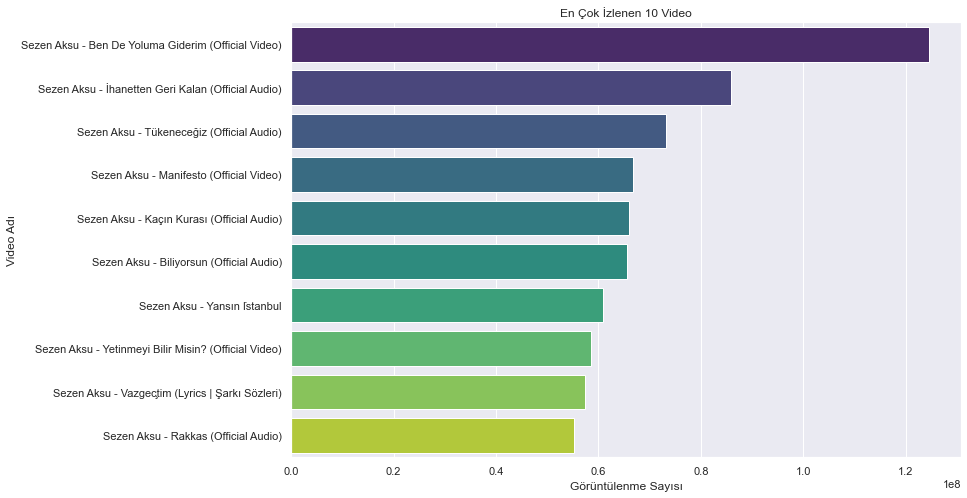

In [243]:
# En √ßok izlenen 10 videoya ait DataFrame'i kullanarak √ßubuk grafik olu≈ütur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_viewed_video_df, palette='viridis')

# Grafik √ºzerine eklemeler
plt.xlabel("G√∂r√ºnt√ºlenme Sayƒ±sƒ±")
plt.ylabel("Video Adƒ±")
plt.title("En √áok ƒ∞zlenen 10 Video")
plt.show()

Kanal'ƒ±n en √ßok beƒüeni alan videolarƒ±

In [244]:
most_liked = video_details.loc[video_details['likeCount'].astype(float).idxmax()]

In [245]:
most_liked_video_info = most_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

In [247]:
most_liked_video_df = pd.DataFrame([most_liked_video_info])
most_liked_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124556506    646903               0        49329  PT3M44S         hd   

   caption  
68    true

In [248]:
# 'likeCount' s√ºtununu sayƒ±sal veri t√ºr√ºne d√∂n√º≈üt√ºr
video_details['likeCount'] = pd.to_numeric(video_details['likeCount'], errors='coerce')

# NaN deƒüerleri temizle
video_details = video_details.dropna(subset=['likeCount'])

# 'likeCount' s√ºtununa g√∂re DataFrame'i sƒ±rala ve en √ßok izlenen 10 videoyu se√ß
top_10_liked = video_details.nlargest(10, 'likeCount')

# En √ßok beƒüenilen 10 videoya ait bilgiler
top_10_liked_video_info = top_10_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok beƒüenilen 10 videoya ait t√ºm bilgileri i√ßerir
top_10_liked_video_df = pd.DataFrame(top_10_liked_video_info)
top_10_liked_video_df.head(5)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
69   uVaG7dvT91s   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
247  -aW8x1jTA2U   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
69   Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...   
235  Sezen Aksu - ƒ∞hanetten Geri Kalan (Official Au...   
213            Sezen Aksu - Manifesto (Official Video)   
247           Sezen Aksu - Biliyorsun (Official Audio)   

                                           description  \
68   "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   
69   "Bu ≈üarkƒ±nƒ±n bestecisi Serkan ƒ∞zzet √ñzdoƒüan. A...   
235  Biraz Pop Biraz Sezen - ƒ∞hanetten Geri Kalan \...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
247  Hayat bazen √∂yle insafsƒ±z ki \nK√º√ß√ºk bir bo≈ülu...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
69   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-01-16T21:00:04Z   
235  [sezen aksu, YENƒ∞ ALB√úM, SEZEN AKSU YENƒ∞, SEZE...  2017-01-23T18:45:19Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
247  [sezen aksu, Biliyorsun, Aƒülamak G√ºzeldir, Sez...  2016-12-26T06:29:53Z   

     viewCount  likeCount  favouriteCount commentCount duration definition  \
68   124556506     646903               0        49329  PT3M44S         hd   
69    58503004     450311               0        19802  PT2M59S         hd   
235   85829371     341234               0        17372  PT3M57S         hd   
213   66711863     337038               0        30937  PT3M31S         hd   
247   65582601     301002               0        12394  PT5M17S         hd   

    caption  
68     true  
69     true  
235   false  
213    true  
247   false

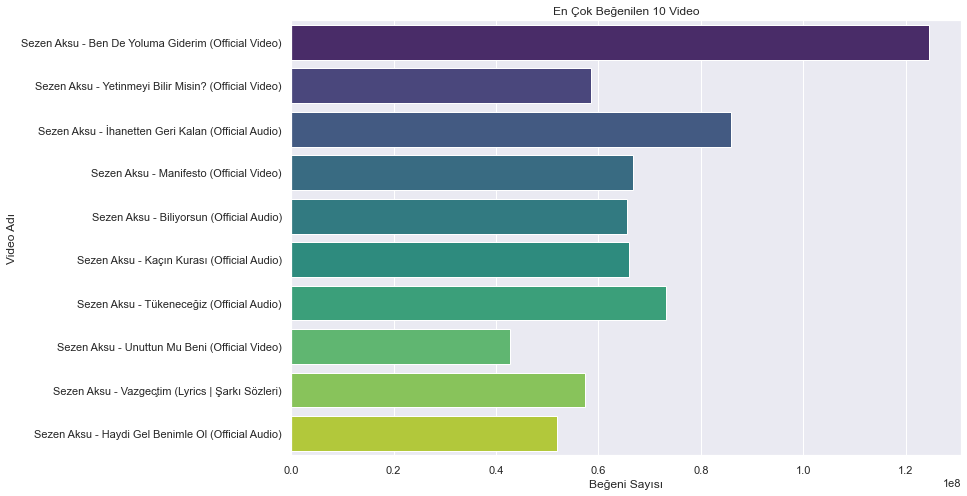

In [249]:
# En √ßok beƒüenilen 10 videoya ait DataFrame'i kullanarak √ßubuk grafik olu≈ütur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_liked_video_df, palette='viridis')

# Grafik √ºzerine eklemeler
plt.xlabel("Beƒüeni Sayƒ±sƒ±")
plt.ylabel("Video Adƒ±")
plt.title("En √áok Beƒüenilen 10 Video")
plt.show()

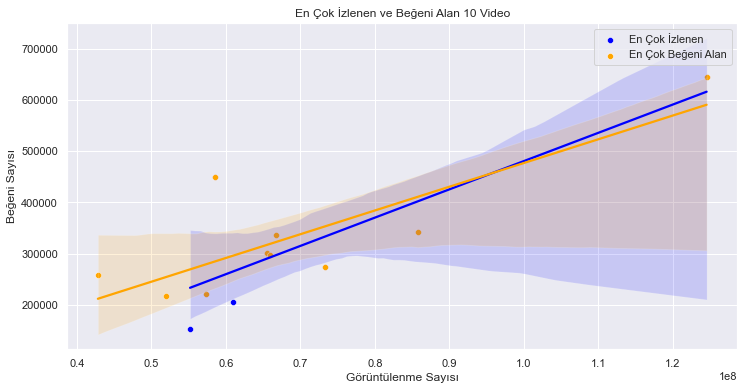

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# En √ßok beƒüeni alan ve en √ßok izlenen 10 videoyu se√ß
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# √áift y√∂nl√º scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_views, color='blue', label='En √áok ƒ∞zlenen')
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_likes, color='orange', label='En √áok Beƒüeni Alan')

# Regresyon √ßizgisi ekle
sns.regplot(x='viewCount', y='likeCount', data=top_10_views, scatter=False, color='blue')
sns.regplot(x='viewCount', y='likeCount', data=top_10_likes, scatter=False, color='orange')

# Grafik √ºzerine eklemeler
plt.xlabel('G√∂r√ºnt√ºlenme Sayƒ±sƒ±')
plt.ylabel('Beƒüeni Sayƒ±sƒ±')
plt.title('En √áok ƒ∞zlenen ve Beƒüeni Alan 10 Video')
plt.legend()
plt.show()

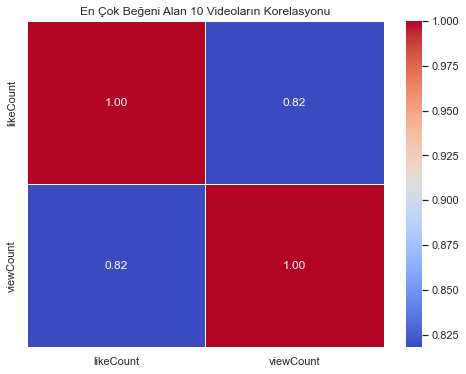

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# En √ßok beƒüeni alan ve en √ßok izlenen 10 videoyu se√ß
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Se√ßilen videolarƒ±n 'likeCount' ve 'viewCount' deƒüi≈ükenleri arasƒ±ndaki korelasyonu hesapla
correlation_matrix_likes = top_10_likes[['likeCount', 'viewCount']].corr()

# Se√ßilen videolarƒ±n 'likeCount' ve 'viewCount' deƒüi≈ükenleri arasƒ±ndaki korelasyonu ƒ±sƒ± haritasƒ± ile g√∂rselle≈ütir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_likes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('En √áok Beƒüeni Alan 10 Videolarƒ±n Korelasyonu')
plt.show()

Beƒüeni sayƒ±sƒ± ve izlenme sayƒ±sƒ± arasƒ±nda g√º√ßl√º bir ili≈üki olduƒüunu g√∂sterir.

In [233]:
# En √ßok izlenen videoya ait ID'yi liste i√ßine eklemek
most_viewed_video_id = most_viewed['video_id']

# most_viewed_video_id artƒ±k en √ßok izlenen videoya ait ID'yi i√ßeren bir pandas Serisi
print(most_viewed_video_id)

p4yxn8ZahPI


In [242]:
# Video istatistiklerini almak i√ßin API isteƒüi olu≈üturalƒ±m.
request = youtube.videos().list(
    part="snippet,statistics",
    id= most_viewed_video_id
)
response = request.execute()

# JSON formatƒ±nda √ßƒ±ktƒ±yƒ± yazdƒ±ralƒ±m.
print(json.dumps(response, indent=2))

{
  "kind": "youtube#videoListResponse",
  "etag": "DFAfFOmdSd9Rmo8S29kS146FiOo",
  "items": [
    {
      "kind": "youtube#video",
      "etag": "Ep6Ilti67bbBmgUwIaU-gZnuhkM",
      "id": "p4yxn8ZahPI",
      "snippet": {
        "publishedAt": "2020-02-20T20:30:04Z",
        "channelId": "UC6OI7Crv96jgra5pwJNDFRQ",
        "title": "Sezen Aksu - Ben De Yoluma Giderim (Official Video)",
        "description": "\"Bu haftaki \u00e7al\u0131\u015fmam\u0131z, f\u0131r\u0131ndan \u00e7\u0131kt\u0131ktan sonra biraz bekletilmi\u015f yeni bir \u015fark\u0131.  \u015e\u00f6yle ki; \u015fark\u0131y\u0131 size teslim ediyorum. \u00d6zellikle de \u00e7almaya, s\u00f6ylemeye hevesli olanlar i\u00e7in d\u00fc\u015f\u00fcnd\u00fcm bunu. Notas\u0131 ve armonilerine a\u015fa\u011f\u0131daki linkten ula\u015fabilirsiniz. Buyurun size cover yerine, s\u0131f\u0131r \u015fark\u0131!\n\nKompozisyon Erman Arda\u2019n\u0131n. Fikir vermesi a\u00e7\u0131s\u0131ndan biraz daha d\u00fczenlemeye evrilmi\u015f ol

In [235]:
video_info = response['items'][0]
title = video_info['snippet']['title']
published_at = video_info['snippet']['publishedAt']
view_count = video_info['statistics']['viewCount']
like_count = video_info['statistics']['likeCount']
favorite_count = video_info['statistics']['favoriteCount']
comment_count = video_info['statistics']['commentCount']

# Verileri DataFrame'e √ßevirme
data = {
    "Video Adƒ±": [title],
    "Yayƒ±n Tarihi": [published_at],
    "G√∂r√ºnt√ºlenme Sayƒ±sƒ±": [view_count],
    "Beƒüeni Sayƒ±sƒ±": [like_count],
    "Favorilere Ekleme Sayƒ±sƒ±": [favorite_count],
    "Yorum Sayƒ±sƒ±": [comment_count]
}

video_df = pd.DataFrame(data)

In [236]:
video_df.head()

Video Adƒ±          Yayƒ±n Tarihi  \
0  Sezen Aksu - Ben De Yoluma Giderim (Official V...  2020-02-20T20:30:04Z   

  G√∂r√ºnt√ºlenme Sayƒ±sƒ± Beƒüeni Sayƒ±sƒ± Favorilere Ekleme Sayƒ±sƒ± Yorum Sayƒ±sƒ±  
0           124556506        646903                        0        49329

# Video hakkƒ±nda yapƒ±lan yorumlarƒ± inceliyoruz.

In [237]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

In [238]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': '9OPx0rfiulR96VqHmFwFFM8v-7s',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJY2dHQUFTQlFpSUlCZ0FFZ1VJaVNBWUFCSUZDSjBnR0FFU0JRaWVJQmdBR0FBaURRb0xDSlQ2NUtrR0VJakR1d1U=',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'ZhYi4pdIR0YzAwHyF6lYMCEWZuk',
   'id': 'UgxOkC5F9EsXGvPt09V4AaABAg',
   'snippet': {'channelId': 'UC6OI7Crv96jgra5pwJNDFRQ',
    'videoId': 'p4yxn8ZahPI',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '5xTe6qbqKWYQAwyqpgkbKa2MEfY',
     'id': 'UgxOkC5F9EsXGvPt09V4AaABAg',
     'snippet': {'channelId': 'UC6OI7Crv96jgra5pwJNDFRQ',
      'videoId': 'p4yxn8ZahPI',
      'textDisplay': 'Ezdirmem kendimii',
      'textOriginal': 'Ezdirmem kendimii',
      'authorDisplayName': '@Dilevinkaya',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/wh_DoxuGAjGSjvNz24IMLAdwcCykF8gqdGJJklRCRoPtPoD5ManYtUmVJn2KBQBZaWxadS3-=s48-

In [239]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

comment = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for item in comment:
    print(item)

Ezdirmem kendimii
Bence hayatan daha √ßok insanlar √ºz√ºyorlar üòîüòî
Insanlarin agzindan cikan sozlerine inanmayin ! √á√ºnk√º  o sozlerin yalan oldugunu birgun kanitlarlar size , hemde en aci halde. ( sende ≈üerefsizlik lakabini kendine takip gittin. Umarim beter olursun mehso / ederinle kal ≈üarkinla birlikte üëãbY
Vay be erkeklerin yorumlarƒ±na bakƒ±yorum da kadinlardan daha aci cekmis bende bir erkek icin oturup aƒülƒ±yorum asla degmezmis bugun 15 gun sonra mesaj attim bir bahaneyle bana kimsiniz dedi üòî vay bee sen otur agla adam mesajima kimsiniz desin üò¢üò¢ bu adalet miiiiiii
Bo≈üluktayƒ±m... parampar√ßa..
Anladƒ±m ki sonu yok yalnƒ±zlƒ±ƒüƒ±n<br>Ben bu d√ºnya da acƒ±lar i√ßin varƒ±m<br>Bazƒ± kullara keder kader olurmu≈ü<br>Ne yazƒ±k ki ben de onlar arasƒ±ndayƒ±m<br><br>G√∂z√ºm kaydƒ± aydƒ±nlƒ±ƒüa bir an<br>Aklƒ±m kaldƒ± orda daha da √ßƒ±kamam<br>Bazƒ± kullarƒ±nƒ± terkeder tanrƒ± acƒ±madan<br>Hi√ßbir sevapla da kurtarƒ±lamayan<br><br>Yok bƒ±rakƒ±p gidemezsin<br>Yok olmaz 

In [240]:
from googletrans import Translator

def ceviri_getir(ifade):
    try:
        translator = Translator()
        translation = translator.translate(ifade, dest="en")
        return translation.text if translation else None
    except Exception as e:
        print(f"Hata olu≈ütu: {str(e)}")
        return None

In [241]:
ceviri_getir('neredesin')

'Where are you'